# Telecom Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch 
from one operator to another. In this highly competitive market, the telecommunications industry 
experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to 
acquire a new customer than to retain an existing one, customer retention has now become even more 
important than customer acquisition.

## Business Goal

Predict which customers are at high risk of churn.

### 1. Reading and understanding the dataset

In [91]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#ignoring warnings

import warnings
warnings.filterwarnings('ignore')

In [93]:
# setting to display max cols and rows

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [94]:
#Loading the data

df_churn = pd.read_csv("telecom_churn_data.csv")

In [95]:
df_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [96]:
#Shape of the dataset

df_churn.shape

(99999, 226)

- There are 99999 rows and 226 columns

In [97]:
#Checking the info

df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


- It looks lot of numerical columns and 12 categorical columns

In [98]:
#Describing the dataset

df_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

### 2. Data Cleaning

In [99]:
# checking variables with only one value

unique_value_cols = df_churn.nunique()[df_churn.nunique() == 1]

unique_value_cols

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64

In [100]:
#dropping unique value columns as they may not add value of our analysis

df_churn.drop(unique_value_cols.index, axis=1, inplace=True)

print('Features after removing unique value columns: ', df_churn.shape[1])

Features after removing unique value columns:  210


In [101]:
#Checking the cols with more than 70% of missing values

cols_grt_50per_missing = df_churn.isnull().mean()[df_churn.isnull().mean()>0.5]*100

cols_grt_50per_missing

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [102]:
#dropping columns with more than 50% of missing values

df_churn.drop(cols_grt_50per_missing.index, axis=1, inplace=True)

In [103]:
#checking the null percentage again

df_churn.isnull().mean()[df_churn.isnull().mean()>0]*100

onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2f_mou_8       5.378054
loc_og_t2f_mou_9       7.745077
loc_og_t2c_mou_6       3.937039
loc_og_t2c_mou_7       3.859039
loc_og_t2c_mou_8       5.378054
loc_og_t

In [104]:
num_cols = df_churn.select_dtypes(include=np.number)

num_cols.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=166)

In [105]:
#impute numerical columns with mean

for cols in num_cols:
    df_churn[cols].fillna(df_churn[cols].mean(), inplace=True)

In [106]:
#checking the null percentage again

df_churn.isnull().mean()[df_churn.isnull().mean()>0]*100

date_of_last_rech_6    1.607016
date_of_last_rech_7    1.767018
date_of_last_rech_8    3.622036
date_of_last_rech_9    4.760048
dtype: float64

In [107]:
#impute category column with mode

cat_cols = df_churn.select_dtypes(exclude=np.number)

cat_cols.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

In [108]:
#impute categorical columns with mode

for cols in cat_cols:
    df_churn[cols].fillna(df_churn[cols].mode()[0], inplace=True)

In [109]:
#checking the null percentage again

df_churn.isnull().mean()[df_churn.isnull().mean()>0]*100

Series([], dtype: float64)

In [110]:
#removing mobile_number column as it may not be useful

df_churn.drop('mobile_number', axis=1, inplace=True)

In [111]:
#dropping date variables as they may not be useful

df_churn.drop(cat_cols, axis=1, inplace=True)

In [112]:
df_churn.shape

(99999, 165)

- Missing values in the data set is handled now
- We have 165 features after the missing value treatment

#### Filtering High Value Customers

In [113]:
#checking the total recharge average for each month

print('Average recharge for month June: ', df_churn.total_rech_amt_6.mean())
print('Average recharge for month July: ', df_churn.total_rech_amt_7.mean())
print('Average recharge for month Aug: ', df_churn.total_rech_amt_8.mean())
print('Average recharge for month Sep: ', df_churn.total_rech_amt_9.mean())

Average recharge for month June:  327.51461514615147
Average recharge for month July:  322.9629696296963
Average recharge for month Aug:  324.1571215712157
Average recharge for month Sep:  303.3456734567346


In [114]:
#calculating average recharge for the months June and July

df_churn['Avg_total_amt_rech_6_7'] = (df_churn.total_rech_amt_6 + df_churn.total_rech_amt_7)/2

In [115]:
#Checking the 70th percentile of recharge amount

rech_70per = df_churn['Avg_total_amt_rech_6_7'].quantile(0.7)

rech_70per

368.5

In [116]:
#Filtering out only the high value customers

df_churn_high_value = df_churn[df_churn['Avg_total_amt_rech_6_7'] >= rech_70per]

df_churn_high_value = df_churn_high_value.reset_index(drop=True)

df_churn_high_value.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0  1069.180  1349.850  3171.480  500.000        57.84        54.68   
1   378.721   492.223   137.362  166.787       413.69       351.03   
2   492.846   205.671   593.260  322.732       501.76       108.39   
3   430.975   299.869   187.894  206.490        50.51        74.01   
4   690.008    18.980    25.499  257.583      1185.91         9.28   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0        52.29   130.302327        453.43        567.16        325.91   
1        35.08    33.460000         94.66         80.63        136.48   
2       534.24   244.810000        413.31        119.28        482.46   
3        70.61    31.340000        296.29        229.74        162.76   
4         7.79   558.510000         61.64          0.00          5.54   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0    190.337222          16.23          33.49          31.64       6.343841   
1    108.710000           0.00           0.00           0.00       0.000000   
2    214.060000          23.53         144.24          72.11     136.780000   
3    224.390000           0.00           2.83           0.00       0.000000   
4     87.890000           0.00           4.76           4.81       0.000000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0          23.74          12.59          38.06       8.555519   
1           0.00           0.00           0.00       0.000000   
2           7.98          35.26           1.44      12.780000   
3           0.00          17.74           0.00       0.000000   
4           0.00           8.46          13.34      17.980000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0             51.39             31.38             40.28         44.584446   
1            297.13            217.59             12.49         26.130000   
2             49.63              6.19             36.01          6.140000   
3             42.61             65.16             67.38         26.880000   
4             38.99              0.00              0.00         36.410000   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0            308.63            447.38            162.28         90.463192   
1             80.96             70.58             50.54         34.580000   
2            151.13             47.28            294.46        108.240000   
3            273.29            145.99            128.28        201.490000   
4             58.54              0.00              0.00          9.380000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0             62.13             55.14             53.23          3.655123   
1              0.00              0.00              0.00          0.000000   
2              4.54              0.00             23.51          5.290000   
3              0.00              4.48             10.26          4.660000   
4              0.00              0.00              0.00          0.000000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0               0.0              0.00          1.232726   
1               0.0               0.0              7.15          0.000000   
2               0.0               0.0              0.49          0.000000   
3               0.0               0.0              0.00          0.000000   
4               0.0               0.0              0.00          0.000000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0        422.16        533.91        255.79     138.70997              4.30   
1        378.09        288.18         63.04      60.71000            116.56   
2        205.31         53.48        353.99     119.69000            446.41   
3        315.91        215.64        205.93     233.04000              7.89   
4         97.54          0.00   

In [117]:
#Dropping calculated average column from the filtered dataset

df_churn_high_value.drop('Avg_total_amt_rech_6_7',axis=1, inplace=True)

In [118]:
df_churn_high_value.shape

(30011, 165)

- After the filter, we have 30011 rows and 165 features

#### Derive Churn

In [119]:
#Deriving churns based on total incoming and outcoming calls and usage of internet

df_churn_high_value['churn'] = df_churn_high_value.apply(lambda r: 1 if (r.total_ic_mou_9==0 and 
                                                                         r.total_og_mou_9 == 0 and 
                                                                         r.vol_2g_mb_9==0 and 
                                                                         r.vol_3g_mb_9==0) else 0, axis=1)

In [120]:
print("Churn Ratio:")

df_churn_high_value.churn.value_counts(normalize=True)*100

Churn Ratio:


0    91.359835
1     8.640165
Name: churn, dtype: float64

- Around 9% of churns are identified

In [121]:
#drop the columns that belongs to churn phase (month 9)

df_churn_high_value = df_churn_high_value.filter(regex='[^9]$',axis=1)

In [122]:
df_churn_high_value.shape

(30011, 126)

- 126 features left after removing the columns belongs to the churn phase month 9

### 3. Data Preparation

#### Derived Variables

- We can derive few features finding difference between month 8 (action phase) with months 6 and 7 (good phase)

In [123]:
#creating few derived features

df_churn_high_value['total_og_mou_diff'] = df_churn_high_value.total_og_mou_8 - ((df_churn_high_value.total_og_mou_6 
                                                                              + df_churn_high_value.total_og_mou_7)/2)

df_churn_high_value['total_ic_mou_diff'] = df_churn_high_value.total_ic_mou_8 - ((df_churn_high_value.total_ic_mou_6 
                                                                              + df_churn_high_value.total_ic_mou_7)/2)

df_churn_high_value['vol_2g_mb_diff'] = df_churn_high_value.vol_2g_mb_8 - ((df_churn_high_value.vol_2g_mb_6 
                                                                              + df_churn_high_value.vol_2g_mb_7)/2)

df_churn_high_value['total_rech_amt_diff'] = df_churn_high_value.total_rech_amt_8 - ((df_churn_high_value.total_rech_amt_6 
                                                                              + df_churn_high_value.total_rech_amt_7)/2)

df_churn_high_value['arpu_diff'] = df_churn_high_value.arpu_8 - ((df_churn_high_value.arpu_6 
                                                                              + df_churn_high_value.arpu_7)/2)

In [124]:
df_churn_high_value.shape

(30011, 131)

In [125]:
df_churn_high_value[['total_og_mou_diff','total_ic_mou_diff','vol_2g_mb_diff','total_rech_amt_diff','arpu_diff']].describe()

total_og_mou_diff  total_ic_mou_diff  vol_2g_mb_diff  \
count       30011.000000       30011.000000    30011.000000   
mean          -74.136452         -15.767241       -9.306090   
std           522.991551         223.521778      218.200488   
min         -7213.410000       -3316.590000    -4740.925000   
25%          -217.340000         -75.382500       -0.547500   
50%           -35.440000          -9.110000        0.000000   
75%            95.047500          47.675000        0.000000   
max         12768.705000        4862.625000     8062.295000   

       total_rech_amt_diff     arpu_diff  
count         30011.000000  30011.000000  
mean            -83.025557    -53.352483  
std             424.891218    341.135243  
min           -6950.000000  -5811.052500  
25%            -273.000000   -195.245500  
50%             -71.000000    -46.093500  
75%             105.000000     90.206250  
max           14344.500000  12808.617000

- Average of the difference is in negative and it clearly shows there is drop in the usage in the month 8 (action phase) from previous two (good phase)

#### EDA

In [126]:
#plotting functions

def univariate(var):
    fig = plt.figure(figsize=(14,6))
    sns.distplot(df_churn_high_value[var])
    plt.xticks(rotation=90)
        
def bivariate(var1, var2):
    fig = plt.figure(figsize=(14,6))
    sns.regplot(var1, var2)
    plt.xticks(rotation=90)

##### Univariate Analysis

In [127]:
uni_cols = ['arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7',
           'total_ic_mou_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_og_mou_diff','total_ic_mou_diff',
           'vol_2g_mb_diff','total_rech_amt_diff','arpu_diff']

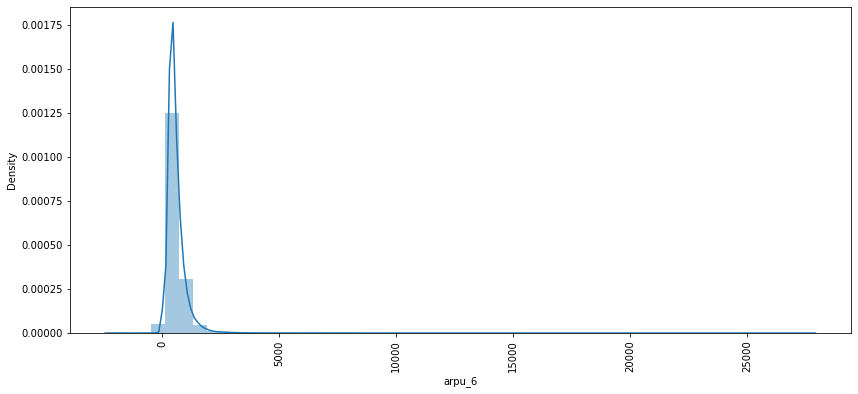

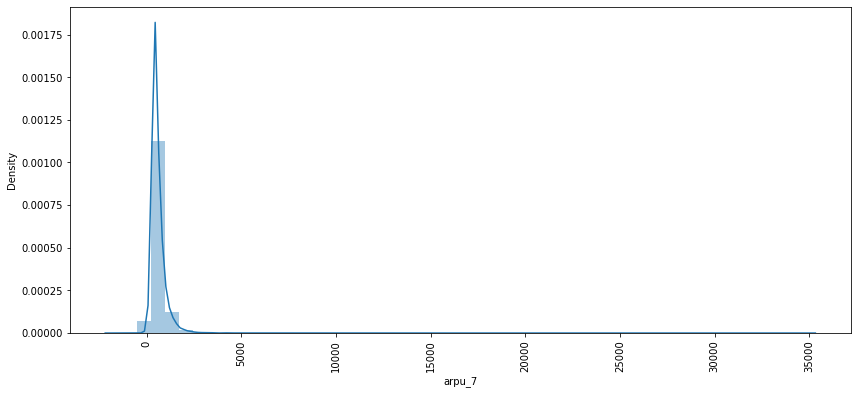

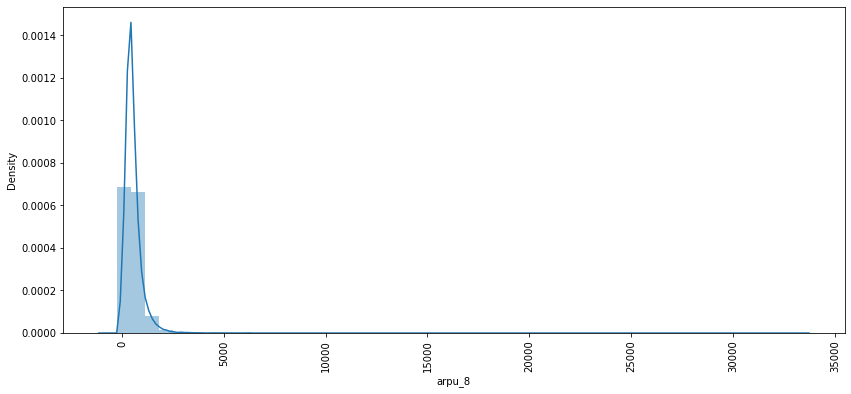

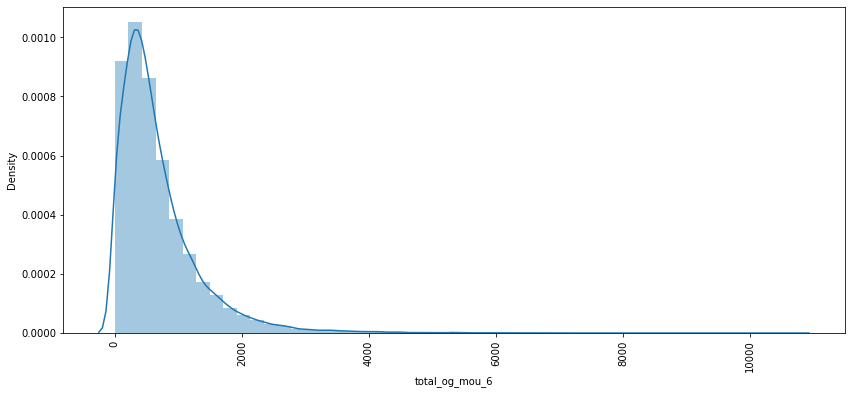

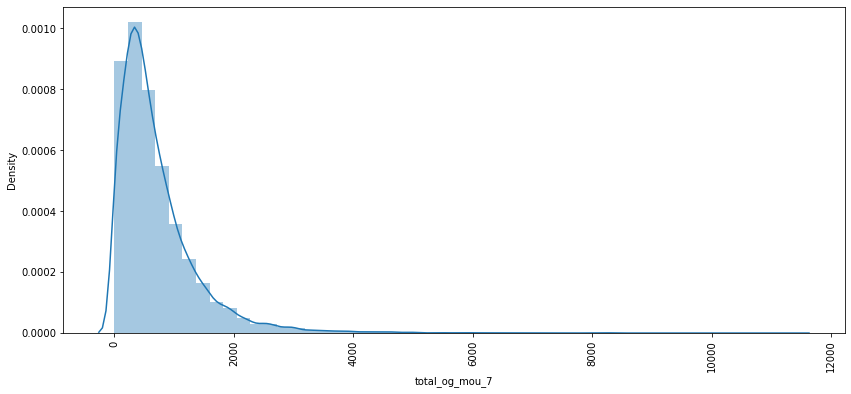

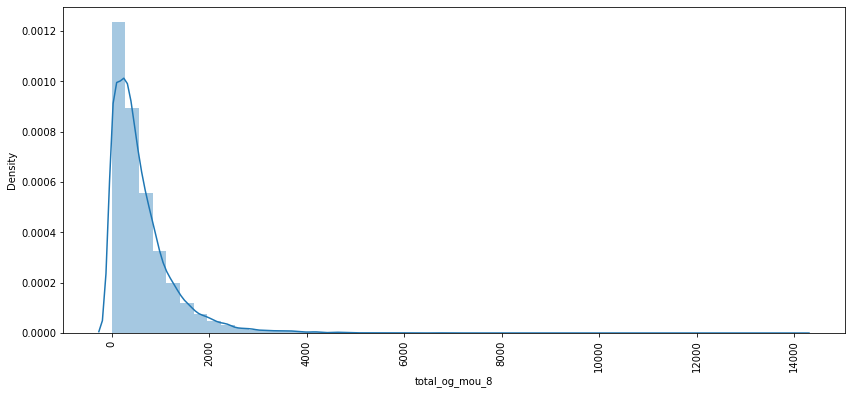

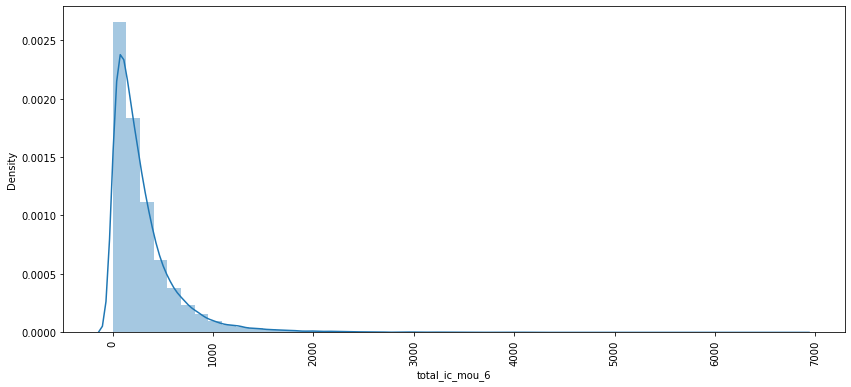

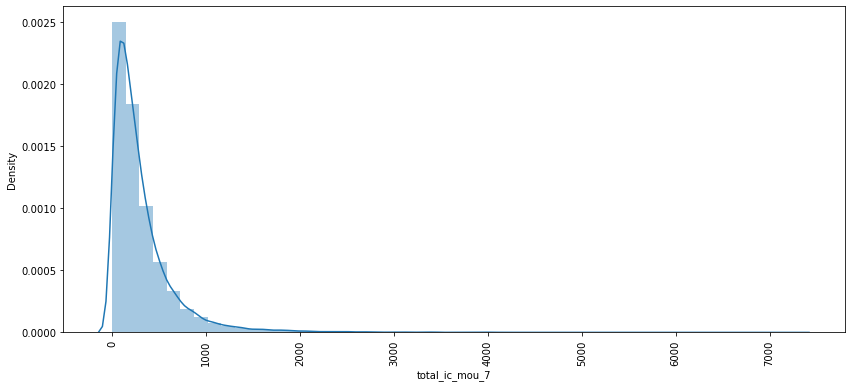

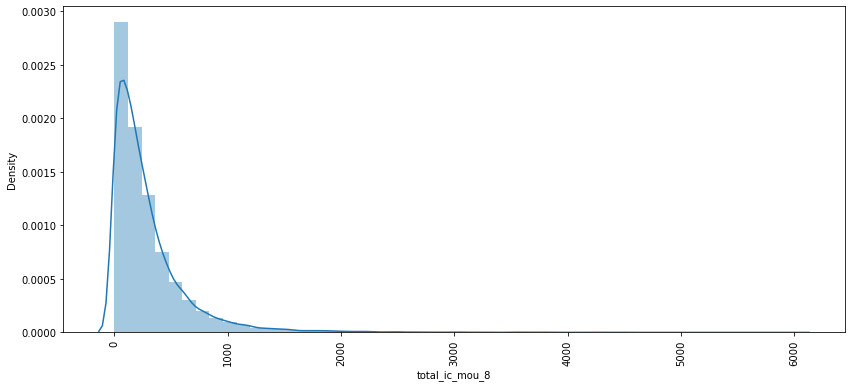

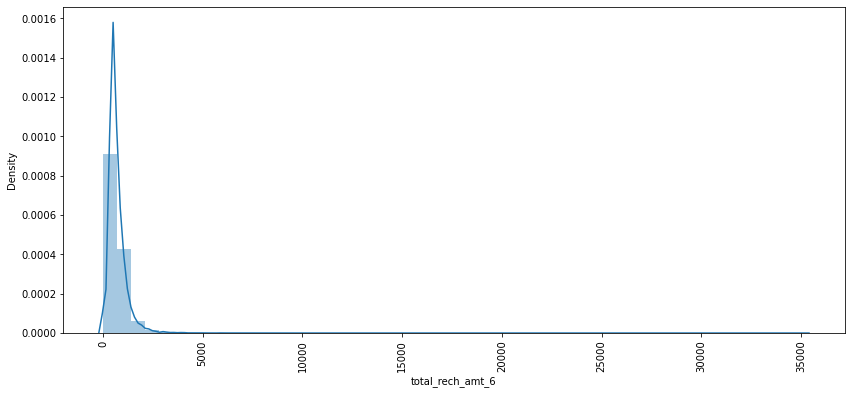

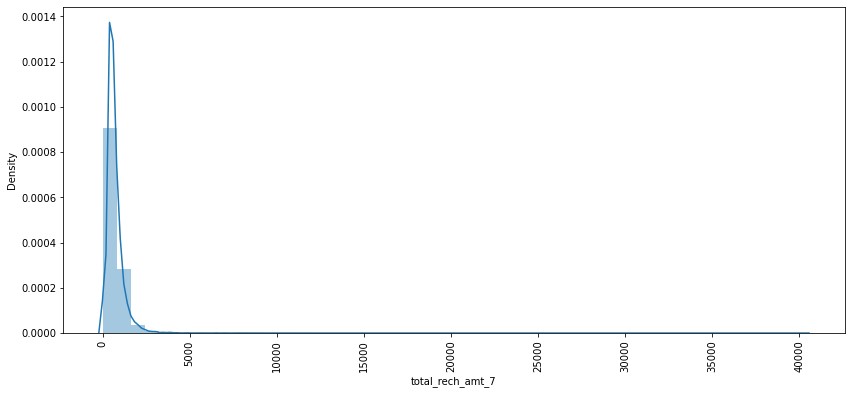

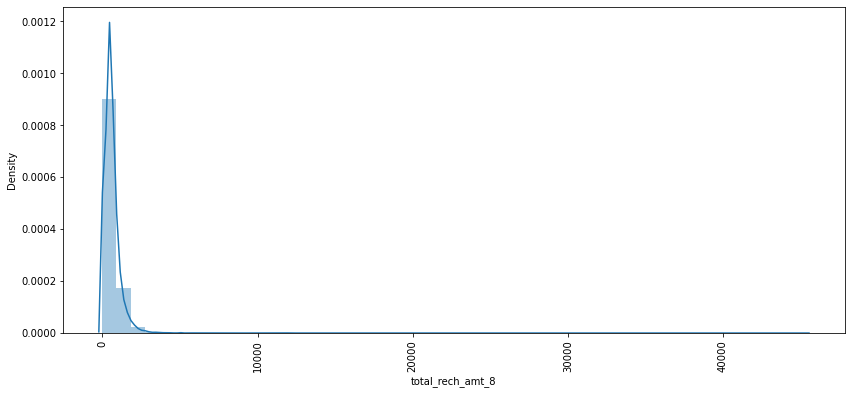

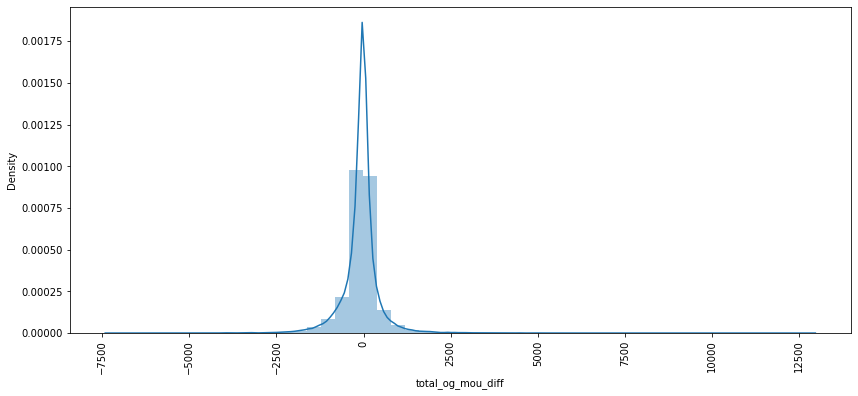

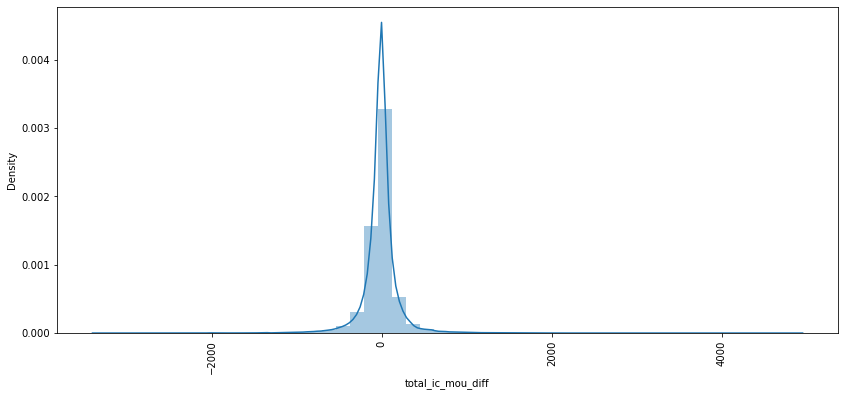

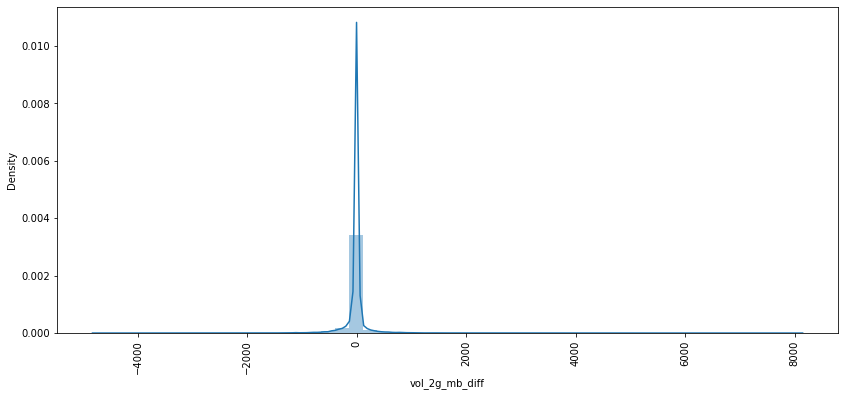

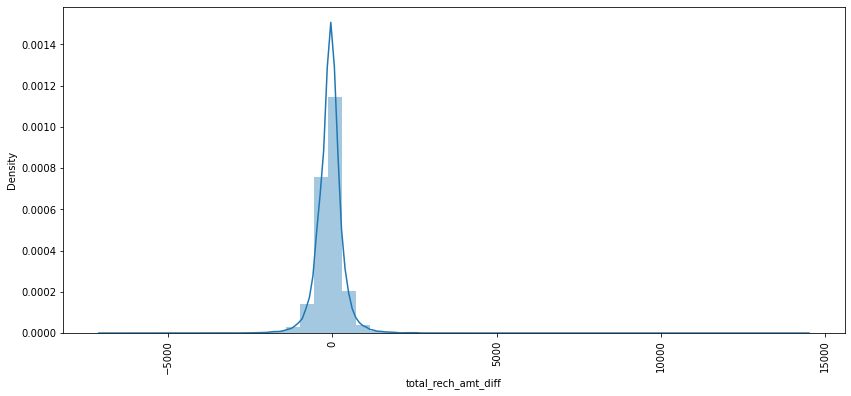

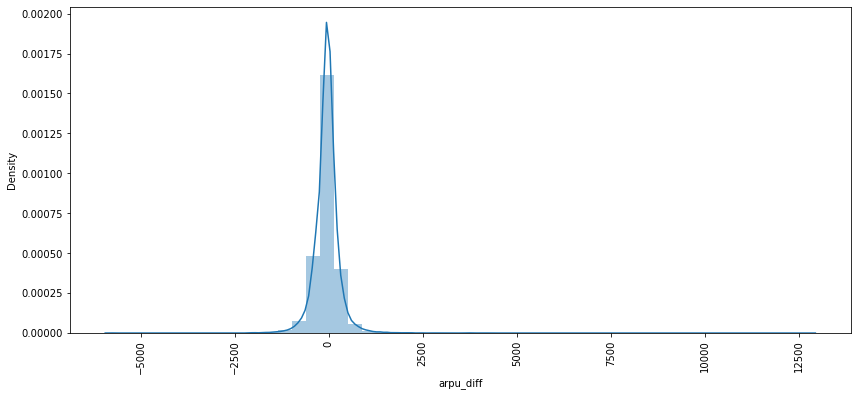

In [128]:
#univariate analysis

for var in uni_cols:
    univariate(var)

##### Bivariate Analysis

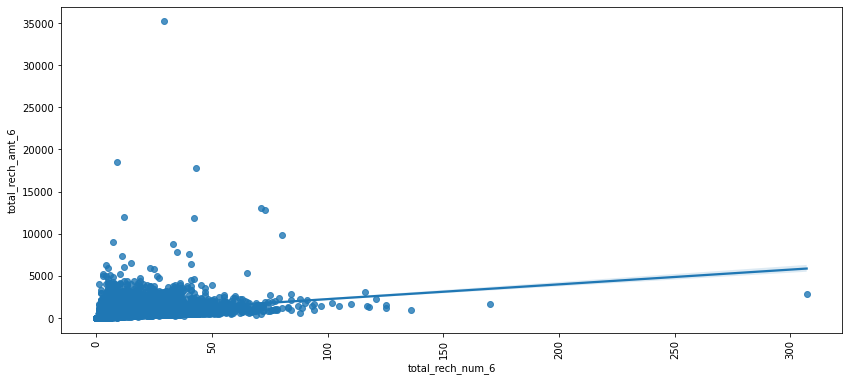

In [129]:
bivariate(df_churn_high_value.total_rech_num_6, df_churn_high_value.total_rech_amt_6)

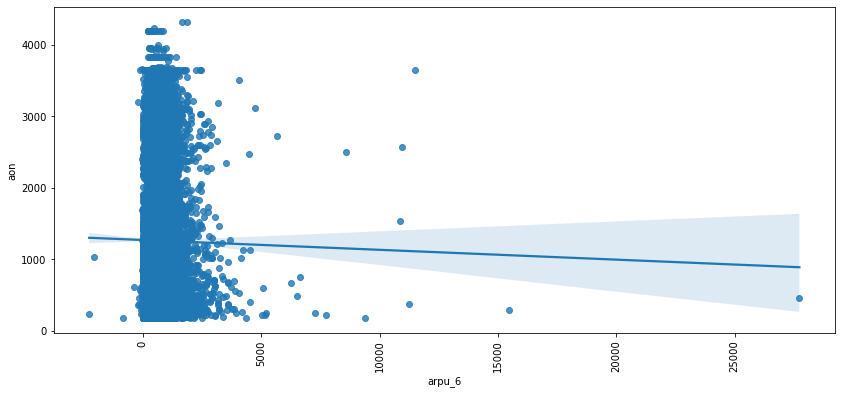

In [130]:
bivariate(df_churn_high_value.arpu_6, df_churn_high_value.aon)

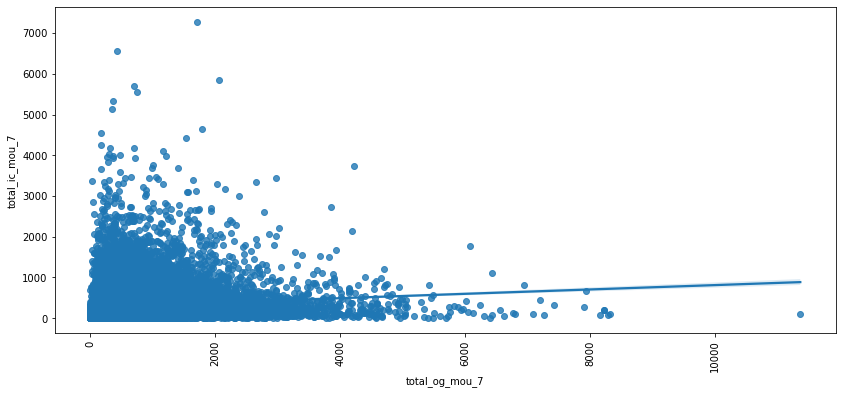

In [131]:
bivariate(df_churn_high_value.total_og_mou_7, df_churn_high_value.total_ic_mou_7)

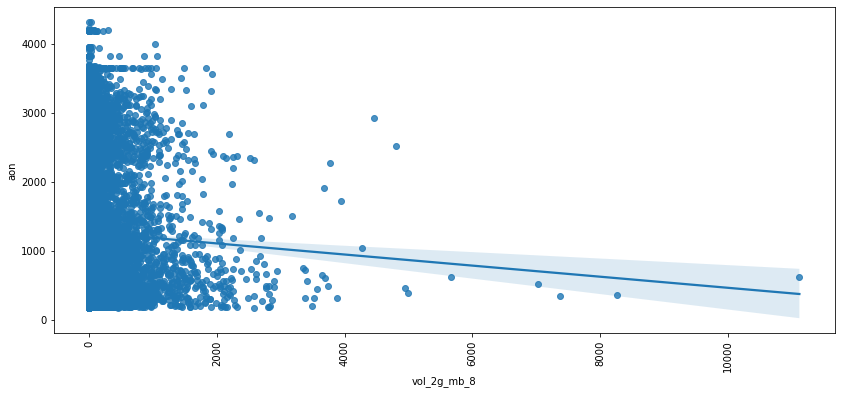

In [132]:
bivariate(df_churn_high_value.vol_2g_mb_8, df_churn_high_value.aon)

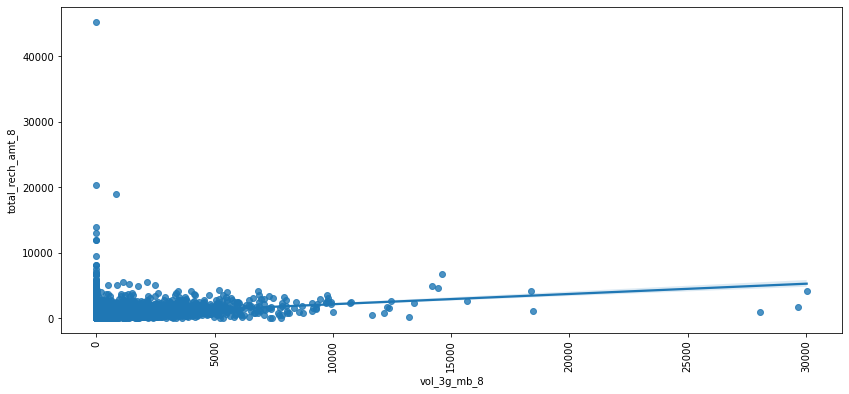

In [133]:
bivariate(df_churn_high_value.vol_3g_mb_8, df_churn_high_value.total_rech_amt_8)

<AxesSubplot:xlabel='churn', ylabel='aon'>

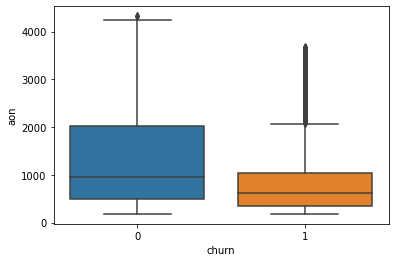

In [134]:
#Age on network vs churn

sns.boxplot(data=df_churn_high_value, x='churn', y='aon')

<AxesSubplot:xlabel='churn', ylabel='total_og_mou_diff'>

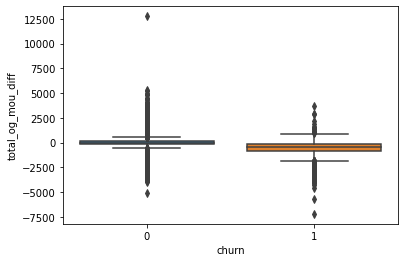

In [135]:
#total_og_mou_diff vs churn

sns.boxplot(data=df_churn_high_value, x='churn', y='total_og_mou_diff')

<AxesSubplot:xlabel='churn', ylabel='total_ic_mou_diff'>

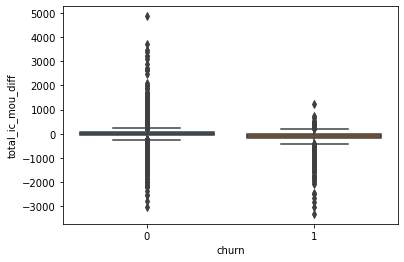

In [136]:
#total_ic_mou_diff vs churn

sns.boxplot(data=df_churn_high_value, x='churn', y='total_ic_mou_diff')

<AxesSubplot:xlabel='churn', ylabel='total_rech_amt_diff'>

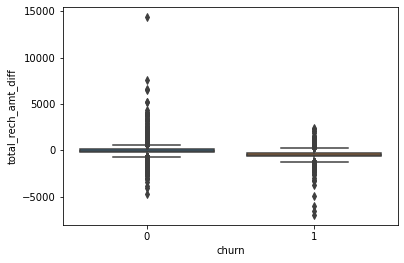

In [137]:
#total_rech_amt_diff vs churn

sns.boxplot(data=df_churn_high_value, x='churn', y='total_rech_amt_diff')

##### Outlier Treatment

In [138]:
#using k-sigma technique

def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [139]:
num_cols = df_churn_high_value.loc[:, ~df_churn_high_value.columns.isin(['churn'])].columns
num_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_og_mou_diff', 'total_ic_mou_diff', 'vol_2g_mb_diff',
       'total_rech_amt_diff', 'arpu_diff'],
      dtype='object', length=130)

In [140]:
# cap outliers in the numeric columns
df_churn_high_value[num_cols] = df_churn_high_value[num_cols].apply(cap_outliers, axis=0)

### 4. Modeling

In [141]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Train-Test Split

In [142]:
#Splitting into train and test

X = df_churn_high_value.drop("churn", axis = 1)

y = df_churn_high_value.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [143]:
#checking the shapes of the split

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21007, 130) (9004, 130) (21007,) (9004,)


In [144]:
X_train.head()

arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
21732  1530.506  1727.936  571.344   387.980000       301.06       306.23   
19336   359.109   861.957  700.153   744.680000      1068.34       865.69   
3166   1238.307   520.013  396.728  1677.661229      1024.31       768.78   
2408    398.910   188.504  165.747   115.940000        80.78        74.01   
16282   382.660   483.078  381.098    19.780000        10.08        12.19   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
21732   1827.524935   1881.480203        862.59           0.00            0.0   
19336    152.380000   1409.640000       1149.81           0.00            0.0   
3166     114.840000     47.930000        107.71           0.00            0.0   
2408     254.990000    139.260000        100.41           0.00            0.0   
16282    198.390000    278.930000        225.11           5.76            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
21732            0.0           0.00            0.0           6.25   
19336            0.0           0.00            0.0           0.00   
3166             0.0           0.00            0.0           0.00   
2408             0.0           0.00            0.0           0.00   
16282            0.0          13.53            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
21732             65.41             73.54            101.61             99.48   
19336              9.16             39.41             34.89             33.29   
3166               1.36              1.98              1.95             25.49   
2408              69.29             35.11             28.14            139.19   
16282             15.01             10.08             12.19            111.83   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
21732            181.14             21.13             16.18              9.71   
19336            160.41             75.66              0.00              0.00   
3166              36.44              8.48              0.70              0.65   
2408              87.78             53.79             55.01             21.73   
16282            191.04            198.71             46.83             47.89   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
21732             12.73             10.18              0.00              0.66   
19336              0.00              8.70              0.00              0.00   
3166               0.00              0.00              0.00              0.00   
2408              21.01              0.00              0.00              0.00   
16282             14.21              2.83             12.88              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
21732        181.08        264.41        135.48        322.560000   
19336         42.46        199.83        110.56        735.510000   
3166          27.56         39.08         10.43       1418.818672   
2408         263.51        144.63        102.96         46.640000   
16282        173.68        249.03        225.13          3.830000   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
21732            227.51            204.61        1443.41775       1527.095937   
19336           1028.93            830.79         110.38000       1245.390000   
3166            1022.33            766.83          88.64000         10.830000   
2408              45.66             45.86          56.64000         29.740000   
16282              0.00              0.00           2.70000          0.000000   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
21732            820.13              4.08              2.03              0.93   
19336           1049.31              0.00              0.00              0.00   
3166              96.33              0

### PCA

In [145]:
# Applying PCA to train data

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [146]:
pca.fit(X_train)

pca_churn = pca.fit_transform(X_train)

In [147]:
# extract pca model from pipeline

pca = pca.named_steps['pca']

In [148]:
pd.DataFrame(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)

0
0     11.60
1     20.49
2     26.37
3     31.10
4     35.26
5     39.15
6     42.78
7     45.62
8     48.24
9     50.67
10    52.87
11    55.06
12    56.96
13    58.82
14    60.55
15    62.19
16    63.69
17    65.12
18    66.46
19    67.72
20    68.89
21    70.02
22    71.12
23    72.18
24    73.20
25    74.17
26    75.08
27    75.96
28    76.79
29    77.58
30    78.36
31    79.13
32    79.85
33    80.54
34    81.22
35    81.87
36    82.50
37    83.12
38    83.71
39    84.28
40    84.84
41    85.38
42    85.92
43    86.44
44    86.93
45    87.40
46    87.85
47    88.28
48    88.70
49    89.10
50    89.50
51    89.89
52    90.27
53    90.64
54    90.99
55    91.34
56    91.69
57    92.02
58    92.33
59    92.64
60    92.93
61    93.22
62    93.50
63    93.76
64    94.01
65    94.25
66    94.48
67    94.71
68    94.94
69    95.17
70    95.39
71    95.61
72    95.83
73    96.04
74    96.24
75    96.44
76    96.64
77    96.82
78    97.00
79    97.17
80    97.34
81    97.50
82    97.66
83    97.81
84    97.96
85    98.11
86    98.25
87    98.37
88    98.49
89    98.60
90    98.71
91    98.82
92    98.93
93    99.02
94    99.11
95    99.19
96    99.27
97    99.34
98    99.40
99    99.47
100   99.53
101   99.59
102   99.63
103   99.67
104   99.71
105   99.74
106   99.77
107   99.79
108   99.82
109   99.84
110   99.85
111   99.87
112   99.88
113   99.90
114   99.91
115   99.92
116   99.93
117   99.94
118   99.95
119   99.96
120   99.96
121   99.97
122   99.98
123   99.98
124   99.99
125   99.99
126   99.99
127  100.00
128  100.00
129  100.00

- 52 components explains 90% of variance approx.
- 69 components explains 95% of variance approx.

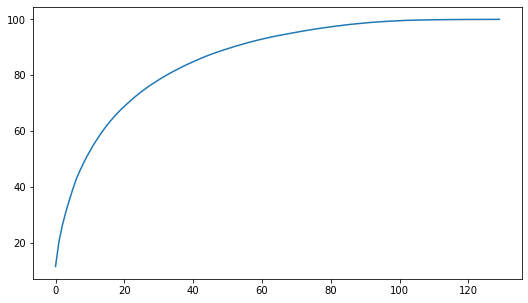

In [149]:
#plot feature variance

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
plt.show()

### Logistic Regression and PCA

In [150]:
#creating pipeline

pca_vars = 52

steps = [('scaler', StandardScaler()), ("pca", PCA(n_components=pca_vars)),("logistic", 
                                                                            LogisticRegression(class_weight='balanced'))]

pipeline = Pipeline(steps)

In [151]:
#fit the model

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=52)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [152]:
#check score on train data

pipeline.score(X_train, y_train)

0.817489408292474

### Test data evaluation

In [153]:
#predict churn on test data
y_pred = pipeline.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')

print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6659 1567]
 [ 138  640]]
Sensitivity: 	0.82
Specificity: 	0.81
AUC:    	 0.88


#### Hyperparameter tuning

In [154]:
# class imbalance

y_train.value_counts()/y_train.shape

0    0.9136
1    0.0864
Name: churn, dtype: float64

In [155]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), ("pca", pca), ("logistic", logistic)]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [156]:
# fit model

model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [157]:
# print best hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8876629514584969
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [158]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6872 1354]
 [ 157  621]]
Sensitivity: 	0.8
Specificity: 	0.84
AUC:    	 0.88


### Using Random Forest

In [159]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [160]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [161]:
# print best hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.926738763885624
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [162]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8107  119]
 [ 404  374]]
Sensitivity: 	0.48
Specificity: 	0.99
AUC:    	 0.93


In [163]:
#Selecting best features

max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_features=max_features, 
                                  class_weight={0:0.1, 1: 0.9}, 
                                  oob_score=True, 
                                  random_state=4, 
                                  verbose=1)

11


In [164]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   28.9s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

In [165]:
# OOB score
rf_model.oob_score_

0.9395439615366307

In [166]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8130   96]
 [ 437  341]]
Sensitivity: 	0.44
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


#### Feature Importance

In [167]:
# predictors
features = df_churn_high_value.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0          roam_og_mou_8               6.377350
1         total_ic_mou_8               5.523189
2          roam_ic_mou_8               4.542079
3                 arpu_8               4.539321
4              arpu_diff               4.319460
5         total_og_mou_8               4.300940
6     last_day_rch_amt_8               3.804167
7    total_rech_amt_diff               3.501915
8       total_rech_amt_8               3.220909
9           loc_ic_mou_8               2.253735
10        max_rech_amt_8               1.954335
11      loc_ic_t2m_mou_8               1.891827
12      loc_og_t2m_mou_8               1.832067
13     total_ic_mou_diff               1.806305
14     total_og_mou_diff               1.706658
15          loc_og_mou_8               1.596889
16      loc_og_t2t_mou_8               1.412018
17      loc_ic_t2t_mou_8               1.379905
18          offnet_mou_8               0.938752
19                   aon               0.859338
20                arpu_7               0.794957
21           og_others_8               0.761759
22          std_ic_mou_8               0.750713
23      loc_og_t2m_mou_7               0.749986
24           onnet_mou_8               0.723458
25          loc_og_mou_7               0.709427
26           vol_2g_mb_8               0.703764
27      loc_og_t2f_mou_8               0.691091
28                arpu_6               0.684120
29      loc_ic_t2m_mou_7               0.681467
30      total_rech_amt_7               0.667920
31          loc_ic_mou_7               0.638818
32        total_ic_mou_7               0.637542
33           vol_3g_mb_8               0.636464
34          loc_og_mou_6               0.634439
35      total_rech_amt_6               0.613156
36      loc_ic_t2f_mou_8               0.605206
37        total_og_mou_7               0.604301
38        total_ic_mou_6               0.601044
39      total_rech_num_8               0.593228
40      loc_og_t2m_mou_6               0.584980
41         roam_ic_mou_7               0.584637
42          offnet_mou_7               0.571145
43        total_og_mou_6               0.562409
44         roam_og_mou_7               0.561604
45        vol_2g_mb_diff               0.552942
46          loc_ic_mou_6               0.551002
47      total_rech_num_7               0.550464
48      std_ic_t2m_mou_8               0.543495
49      loc_ic_t2m_mou_6               0.541562
50          std_og_mou_8               0.530970
51      loc_og_t2t_mou_7               0.527487
52          std_og_mou_7               0.524170
53      loc_ic_t2t_mou_7               0.519629
54      loc_ic_t2t_mou_6               0.516653
55      std_og_t2m_mou_7               0.508150
56           onnet_mou_7               0.501041
57      loc_og_t2t_mou_6               0.498864
58          offnet_mou_6               0.496277
59           onnet_mou_6               0.479119
60      total_rech_num_6               0.478892
61          std_og_mou_6               0.477751
62        max_rech_amt_7               0.467322
63      std_og_t2m_mou_6               0.461160
64          std_ic_mou_7               0.461018
65        max_rech_amt_6               0.456813
66      std_og_t2t_mou_7               0.454401
67      std_og_t2m_mou_8               0.453394
68      std_og_t2t_mou_8               0.448155
69          std_ic_mou_6               0.446499
70      std_ic_t2m_mou_6               0.440656
71      std_ic_t2t_mou_8               0.429546
72          isd_og_mou_8               0.426129
73    last_day_rch_amt_7               0.417488
74          spl_og_mou_8               0.415063
75      std_og_t2t_mou_6               0.407077
76          spl_og_mou_7               0.404200
77      std_ic_t2m_mou_7               0.402881
78      loc_og_t2f_mou_7               0.396652
79      loc_ic_t2f_mou_7               0.382151
80    last_day_rch_amt_6               0.378433
81      loc_ic_t2f_mou_6               0.366424
82      std_ic_t2t_mou_7       

In [168]:
#Storing top 25 features

top_features = feature_importance.variables[0:25]

top_features

0           roam_og_mou_8
1          total_ic_mou_8
2           roam_ic_mou_8
3                  arpu_8
4               arpu_diff
5          total_og_mou_8
6      last_day_rch_amt_8
7     total_rech_amt_diff
8        total_rech_amt_8
9            loc_ic_mou_8
10         max_rech_amt_8
11       loc_ic_t2m_mou_8
12       loc_og_t2m_mou_8
13      total_ic_mou_diff
14      total_og_mou_diff
15           loc_og_mou_8
16       loc_og_t2t_mou_8
17       loc_ic_t2t_mou_8
18           offnet_mou_8
19                    aon
20                 arpu_7
21            og_others_8
22           std_ic_mou_8
23       loc_og_t2m_mou_7
24            onnet_mou_8
Name: variables, dtype: object

<AxesSubplot:>

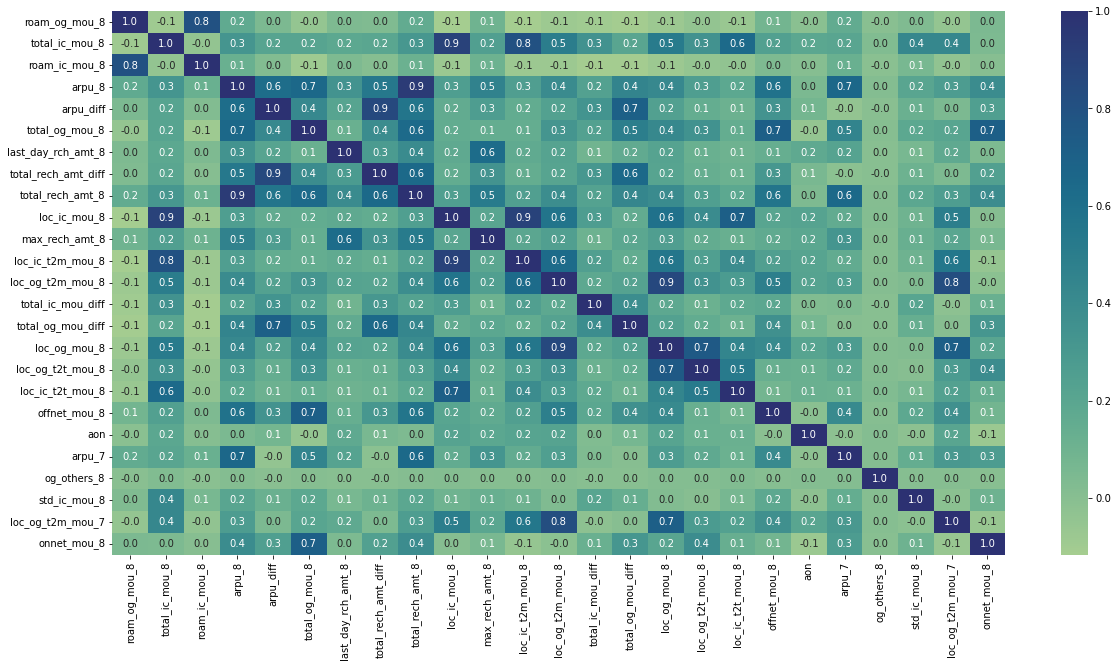

In [169]:
#Finding correlation between top features

plt.figure(figsize=(20,10))
sns.heatmap(data=X_train[top_features].corr(), annot=True, fmt=".1f", cmap="crest")


In [170]:
X_train = X_train[top_features]
X_test = X_test[top_features]

In [171]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [172]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [173]:
# print best hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8849854934804942
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2'}


### 5. Evaluate the model

In [174]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7031 1195]
 [ 149  629]]
Sensitivity: 	0.81
Specificity: 	0.85
ROC:    	 0.89


In [175]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [176]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [177]:
intercept_df

intercept
0  -1.410605

In [178]:
# coefficients
coefficients = logistic_model.coef_.tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [179]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  roam_og_mou_8  total_ic_mou_8  roam_ic_mou_8    arpu_8  \
0  -1.410605       0.243691       -2.199627       0.046393 -0.105864   

   arpu_diff  total_og_mou_8  last_day_rch_amt_8  total_rech_amt_diff  \
0  -0.120414       -0.682388           -0.369358            -0.227918   

   total_rech_amt_8  loc_ic_mou_8  max_rech_amt_8  loc_ic_t2m_mou_8  \
0         -0.331159      0.815015         0.11719          0.377512   

   loc_og_t2m_mou_8  total_ic_mou_diff  total_og_mou_diff  loc_og_mou_8  \
0         -0.715777          -0.339853          -0.229739      0.868331   

   loc_og_t2t_mou_8  loc_ic_t2t_mou_8  offnet_mou_8       aon    arpu_7  \
0         -0.715005          0.284624      0.427882 -0.271868  0.300941   

   og_others_8  std_ic_mou_8  loc_og_t2m_mou_7  onnet_mou_8  
0    -0.026879      0.510805         -0.234087     0.403203

### Conclusion

- Local incoming calls, outgoing calls, all kinds of call outside and within the network have postive relations.
- Total incoming calls, outgoing calls, total recharge amount are negatively impacted.
- Age on network is also one of the factor that impacts negatively.
- The network company should focus on the above features to improvie their service and retain the existing customers